In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import dimers as dim

In [3]:
import KagomeFunctions as lattice

In [4]:
import itertools

In [5]:
from scipy.special import erfc

In [6]:
from time import time

In [7]:
import DualwormFunctions as dw
import Observables as obs

%load_ext line_profiler
%load_ext memory_profiler

import RunBasis
import argparse
import StartStates as strst
import numpy as np

import AnalysisFunctions as af # functions to make the analysis code cleaner
import KagomeDrawing as kdraw


import matplotlib.pyplot as plt
%matplotlib inline

import yep

In [8]:
nst = 2048;
nsm = 32;
nips = 4;
nrps = 4;
nb = 4;
measperiod = 1;
nt = 128
nh = 1
ncores = 4
nmaxiter = 1
L =4
J1 = -0.2
J2 = 1
J3 = 1
h = 0
notfullstateupdate = True
stroutput = "Phase8_J1-0.2J21J31_L{0}_tests_1".format(L)#_folder

In [9]:
# Create a folder to save the pictures
foldername = "./" + stroutput + "_folder/" 
results_foldername = 'Results/'
os.makedirs(foldername + 'Plots' + results_foldername, exist_ok = True)

filenamelist = ["backup"]
n = len(filenamelist)

In [10]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh,
 stat_hfields, hfields_plots, listfunctions, sref,ids2walker] =\
af.LoadParameters(foldername, filenamelist)

In [11]:
kw = {'binning': False, 'plzplot': True, 'plotmin': 0, 'plotmax': 16}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, C, ErrC] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields,
               listfunctions, **kw)

[-1.8]


In [12]:
t_h_MeanE[0][0]

array([-1.8])

In [13]:
# Load the states
t_spinstates, t_states, t_charges = af.LoadStates(stroutput+"_folder/", ["backup"], L, nh)
latsize = t_spinstates[0][62].size
[d_ijl, ijl_d, s_ijl, ijl_s, d_2s, s2_d, d_nd, d_vd, d_wn,
     sidlist, didlist, c_ijl, ijl_c, c2s, csign] =\
    dw.latticeinit(L[0])
print(ids2walker[0][0,0])

6


In [14]:
[groundspinstates, groundstates, groundcharges] = \
 af.LoadGroundStates(stroutput+"_folder/", filenamelist, L, nh, [nsm],**kw)

groundspinstates = groundspinstates[0]
groundstates = groundstates[0]
groundcharges = groundcharges[0]


In [15]:
L = L[0]
couplings = {'J1':J1[0], 'J2':J2[0],'J3':J3[0], 'J3st':J3[0]}
hamiltonian = dw.Hamiltonian(couplings, d_ijl, ijl_d, L)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Energy per site: -1.7999999999999683


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Energy per site: -1.7999999999999683


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Energy per site: -1.7999999999999683


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Energy per site: -1.7999999999999683


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Energy per site: -1.7999999999999683


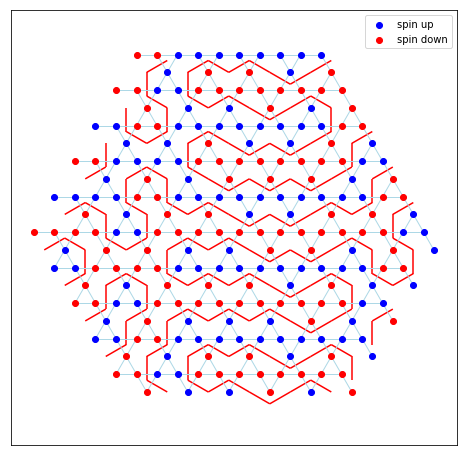

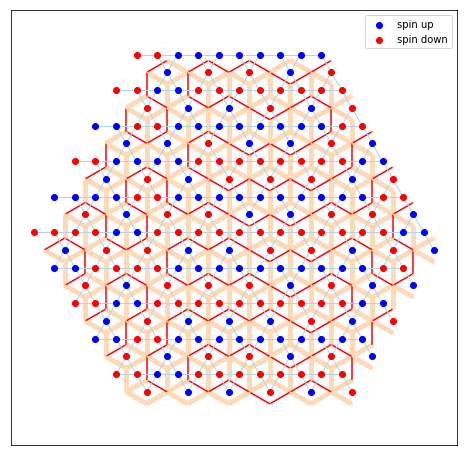

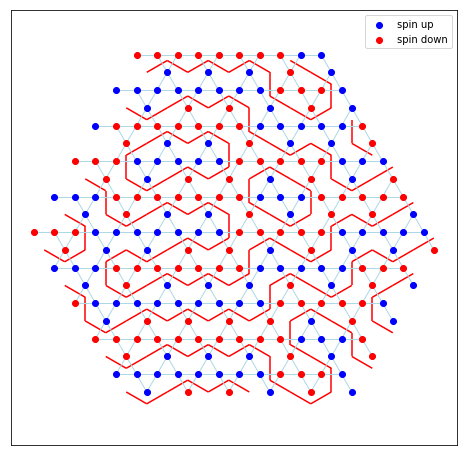

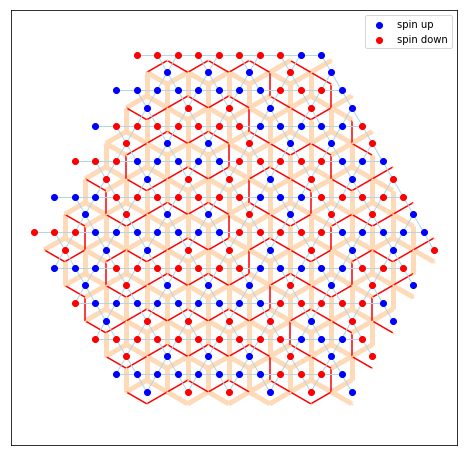

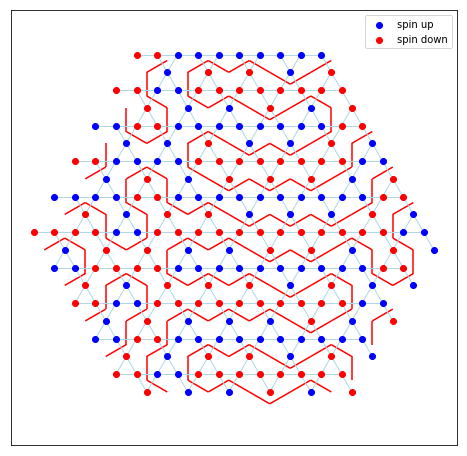

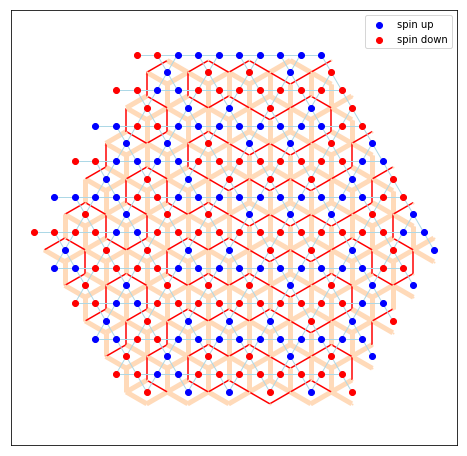

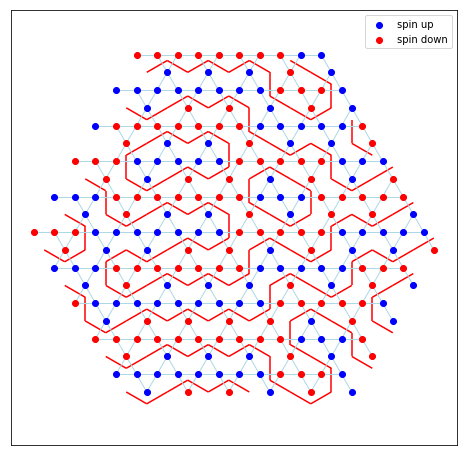

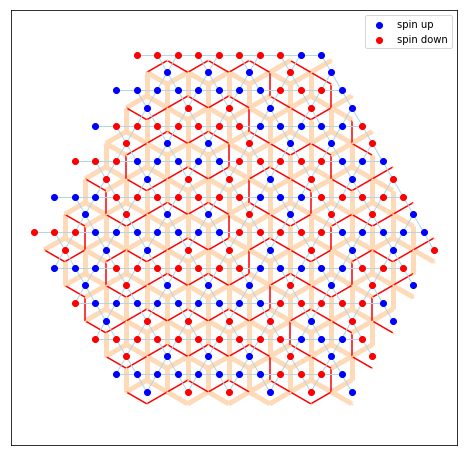

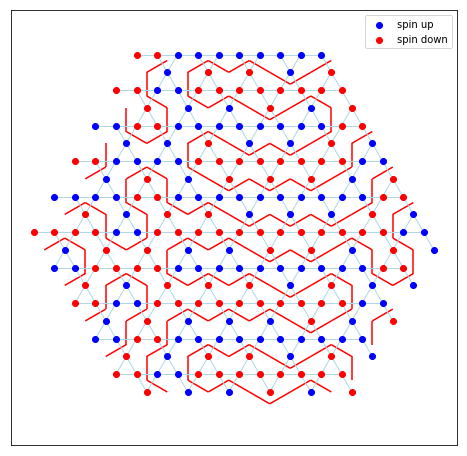

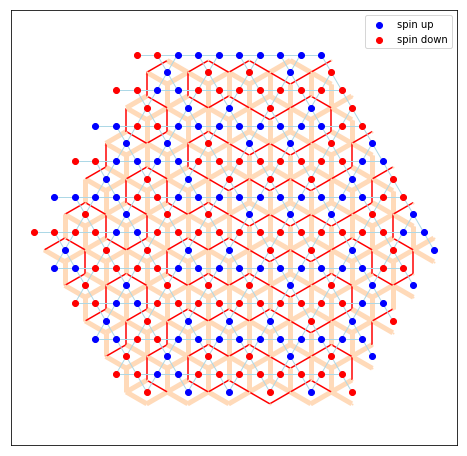

In [18]:
#### State analysis
for i in range(5):
    #state = t_states[0][ids2walker[0][i,0]]
    state = groundstates[i]
    #spinstate = t_spinstates[0][ids2walker[0][i,0]]
    spinstate = groundspinstates[i]
    #charges = obs.charges(0, state, 0 , spinstate, s_ijl, ijl_s,c2s = c2s , csign= csign)
    charges = groundcharges[i]
    print("Energy per site:" ,dw.compute_energy(hamiltonian, groundstates[i], len(s_ijl)))
    
    kdraw.plotstate(0, L, d_ijl, ijl_s, sidlist, didlist, s2_d, [state], [spinstate],
                    dim_node_color = (1, 1, 0, 0), dim_color =(1, 1, 0, 0), no_dim_color="red",
                    spin_up_color = 'blue', spin_down_color = 'red')
    #kdraw.plot_honeycomb_chargestate(charges, ijl_c,
    #                                 L,2,c1_color = 'blue', c2_color = 'green',
    #                                 c3_color = 'red', c4_color = 'yellow', uponly=False)
    plt.legend()
    plt.savefig("./"+stroutput+"_folder/PlotsResults/GSConfig{0}_redlines.png".format(i))
    
    
    kdraw.plotstate(0, L, d_ijl, ijl_s, sidlist, didlist, s2_d, [state], [spinstate],
                    dim_node_color = 'peachpuff', dim_color ='peachpuff', no_dim_color="red",
                    spin_up_color = 'blue', spin_down_color = 'red')
    #kdraw.plot_honeycomb_chargestate(charges, ijl_c,
    #                                 L,2,c1_color = 'blue', c2_color = 'green',
    #                                 c3_color = 'red', c4_color = 'yellow', uponly=False)
    plt.legend()
    plt.savefig("./"+stroutput+"_folder/PlotsResults/GSConfig{0}_redlines+dimers.png".format(i))